<a href="https://colab.research.google.com/github/AnthonyRom12/MNIST_Keras/blob/main/Single_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Decision Tree

In [3]:
# Standart Libraries
import os
import numpy as np
import pandas as pd
import random as rn

# Visualization libraries
import pydotplus
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from six import StringIO
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Seed for reproducability
seed = 1234
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [4]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float: return round(accuracy_score(y_true, y_pred) * 100, 2)

## Loading Data

In [8]:
from keras.datasets import mnist

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')

training_dataset_x = training_dataset_x.reshape(-1, 28 * 28)
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

## Baseline DTR(Decision Tree) Model & Training

In [9]:
# Train baseline decision tree model
clf = DecisionTreeClassifier(max_depth=30, random_state=seed)
%time clf.fit(training_dataset_x, training_dataset_y)

CPU times: user 22.7 s, sys: 1.15 ms, total: 22.7 s
Wall time: 22.7 s


DecisionTreeClassifier(max_depth=30, random_state=1234)

## Evaluation

In [11]:
training_pred_result_clf = clf.predict(training_dataset_x)
test_pred_result_clf = clf.predict(test_dataset_x)

training_sccuracy = (training_dataset_y == training_pred_result_clf).sum() / len(training_dataset_y)
test_sccuracy = (test_dataset_y == test_pred_result_clf).sum() / len(test_dataset_y)

print("Training accuracy for our baseline (using all pixel features): {}".format(training_sccuracy))
print("Validation accuracy for our baseline (using all pixel features): {}".format(test_sccuracy))

Training accuracy for our baseline (using all pixel features): 0.9983
Validation accuracy for our baseline (using all pixel features): 0.8769


## Convert Decision Tree to visualization

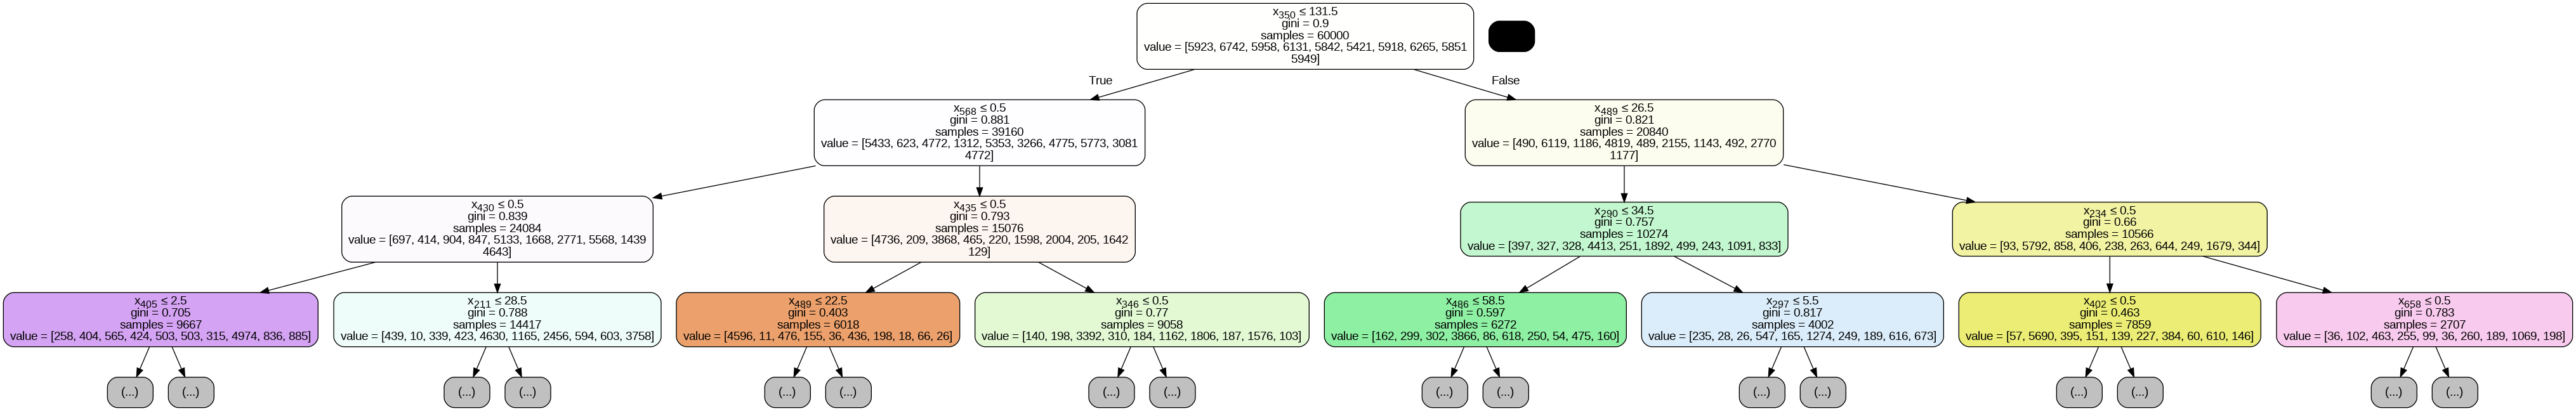

In [12]:
# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create PNG file
Image(graph.create_png())